<div style="text-align: center;">
    <h1 style="font-size:50px">ResNet50</h1>
</div>
<h1>Objective</h1>
<p style="font-size:15px;line-height: 1.5;">The objective of this project is to develop a deep learning model, specifically ResNet50, that can accurately classify images into one of ten classes based on their visual features. The ten classes in the CIFAR-10 dataset are:</p>
<ul style="font-size:15px;line-height: 1.5;">
    <li>Airplane</li>
    <li>Automobile</li>
    <li>Bird</li>
    <li>Cat</li>
    <li>Deer</li>
    <li>Dog</li>
    <li>Frog</li>
    <li>Horse</li>
    <li>Ship</li>
    <li>Truck</li>
</ul>

<p style="font-size:15px">Each class has unique visual characteristics that the model will learn to identify.</p>
<h1>Dataset</h1>
<p style="font-size:15px;line-height: 1.5;">The CIFAR-10 dataset has been used for this project. It contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into a training set of 50,000 images and a test set of 10,000 images.</p>
<ul style="font-size:15px;line-height: 1.5;">
    <li><strong>Features</strong>: 32x32 color images with 3 channels (RGB).</li>
    <li><strong>Target</strong>: Class label of the image (one of the 10 classes).</li>
</ul>
<h1>Approach</h1>
<ul style="font-size:15px;line-height: 1.5;">
    <li>First, the dataset is explored to understand its structure and distribution of classes.</li>
    <li>Visualization of the dataset is done to show sample images from each class.</li>
    <li>Pre-processing of the dataset includes normalization and one-hot encoding of the labels.</li>
    <li>The ResNet50 model is built from scratch using TensorFlow and Keras.</li>
    <li>The model is trained on the training set and validated on the test set.</li>
    <li>Performance metrics such as accuracy and loss are evaluated and visualized for both training and testing phases.</li>
</ul>

## Loading the required libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Loading the CIFAR-10 Dataset

In [12]:
# We directly load the dataset from keras datasets

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Displaying images from each class

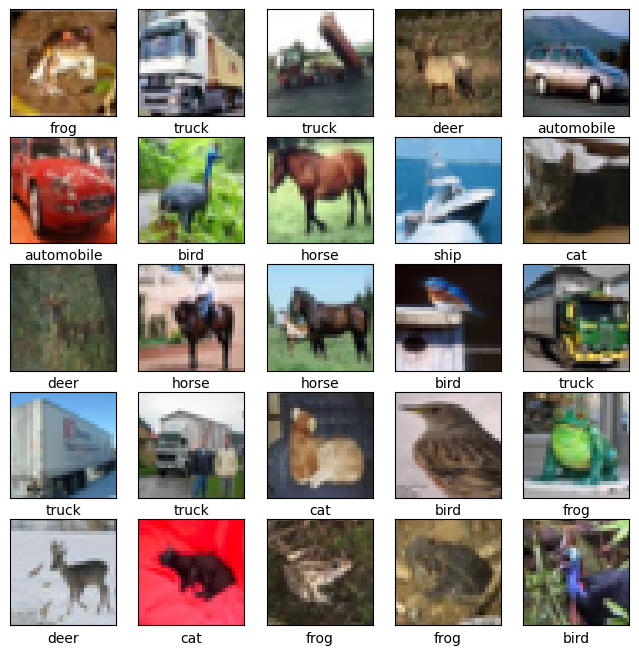

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[np.argmax(train_labels[i])])
plt.show()

## Printing the training and testing set shape

In [7]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Testing images shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 10)


<ul style="font-size:15px;line-height: 1.5;">
    <li>The training set consists of 50000, 32x32 images with 3 channels (RGB).</li>
    <li>The testing set consists of 10000, 32x32 images with 3 channels (RGB).</li>
</ul>

## Plotting the training and testing sets

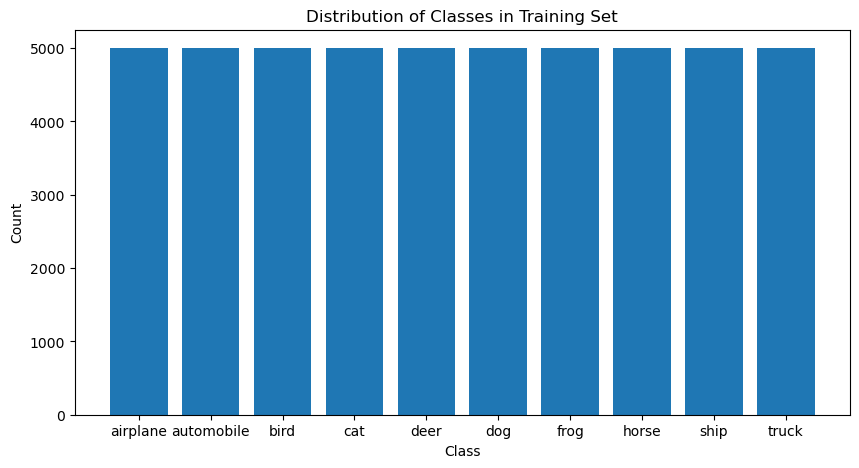

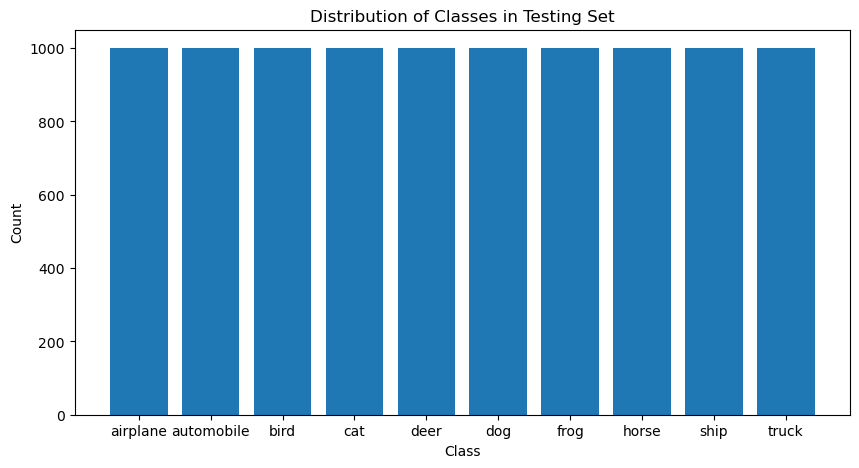

In [8]:
# Distribution of classes in training set
train_labels_count = np.sum(train_labels, axis=0)
plt.figure(figsize=(10, 5))
plt.bar(class_names, train_labels_count)
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Distribution of classes in testing set
test_labels_count = np.sum(test_labels, axis=0)
plt.figure(figsize=(10, 5))
plt.bar(class_names, test_labels_count)
plt.title('Distribution of Classes in Testing Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<ul style="font-size:15px;line-height: 1.5;">
    <li>There are 5000 images of each class in the training set</li>
    <li>There are 1000 images of each class in the testing set.</li>
</ul>

## Pre-processing the data

In [10]:
# Normalizing the data to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encoding ef labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

## Creating the ResNet50 model from a scratch

In [ ]:
def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=False):
    shortcut = x
    if conv_shortcut:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

In [ ]:
def create_resnet50_scratch(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, 3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64, conv_shortcut=True)
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2, conv_shortcut=True)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2, conv_shortcut=True)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2, conv_shortcut=True)
    x = residual_block(x, 512)
    x = residual_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

In [ ]:
resnet50_scratch = create_resnet50_scratch()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
resnet50_scratch.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_scratch.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_74 (Conv2D)          (None, 32, 32, 64)           1792      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_74 (Ba  (None, 32, 32, 64)           256       ['conv2d_74[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_66 (Activation)  (None, 32, 32, 64)           0         ['batch_normalization_74[0

## Training the model

In [ ]:
resnet50_history = resnet50_scratch.fit(
    train_images, train_labels,
    epochs=70,
    validation_data=(test_images, test_labels)
)

Epoch 1/70
1563/1563 [==============================] - 97s 46ms/step - loss: 1.4323 - accuracy: 0.4828 - val_loss: 1.2150 - val_accuracy: 0.5685
Epoch 2/70
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9966 - accuracy: 0.6490 - val_loss: 1.0255 - val_accuracy: 0.6371
Epoch 3/70
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7674 - accuracy: 0.7317 - val_loss: 0.9443 - val_accuracy: 0.6842
Epoch 4/70
1563/1563 [==============================] - 73s 47ms/step - loss: 0.5892 - accuracy: 0.7926 - val_loss: 0.8403 - val_accuracy: 0.7175
Epoch 5/70
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4362 - accuracy: 0.8486 - val_loss: 0.8893 - val_accuracy: 0.7209
Epoch 6/70
1563/1563 [==============================] - 72s 46ms/step - loss: 0.3167 - accuracy: 0.8890 - val_loss: 1.0035 - val_accuracy: 0.7091
Epoch 7/70
1563/1563 [==============================] - 70s 45ms/step - loss: 0.2329 - accuracy: 0.9177 - val_loss: 0.9490 -

## Printing the training and testing accuracy

In [ ]:
train_loss = resnet50_history.history['loss']
train_acc = resnet50_history.history['accuracy']
val_loss = resnet50_history.history['val_loss']
val_acc = resnet50_history.history['val_accuracy']

print(f"Final Training Accuracy: {train_acc[-1]*100:.2f}%")
print(f"Final Testing Accuracy: {val_acc[-1]*100:.2f}%")

Final Training Accuracy: 99.44%
Final Testing Accuracy: 78.97%


## Plotting the accuracy and loss

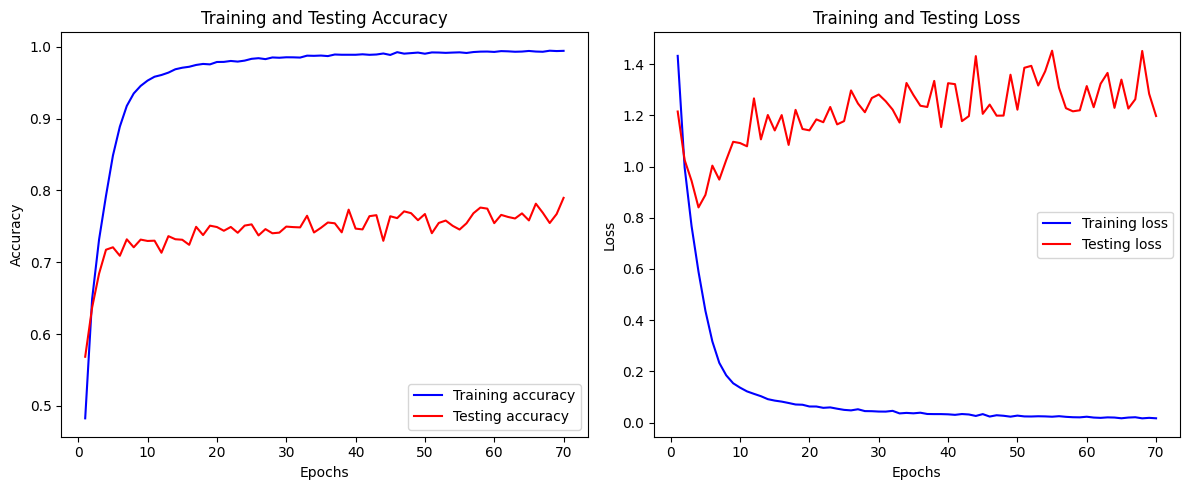

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Testing loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()